In [4]:
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
df = pd.read_csv('dataset_Caso_2024-1.csv', sep=',')
df.head()

,Titulo,Fecha Publicacion,Resumen,Empresa,Fuente,Contenido,Tags,Tema,Autor,Unnamed: 9,Unnamed: 10
0,Más de 500 trabajadores de Cicadebo quedaron s...,3/30/2023,Más de 48 horas completan las manifestaciones ...,Cicadebo,Rívenmosa,Más de 48 horas completan las manifestaciones ...,"['Cicadebo', 'Barrancabermeja', 'Santander', '...",Nación,NaN,NaN,NaN
1,Acción de Cicadebo se mantuvo estable en la ap...,3/30/2023,Luego del nombramiento de Ricardo Roa como nue...,Cicadebo,Rívenmosa,Luego del nombramiento de Ricardo Roa como nue...,"['Cicadebo', 'BVC', 'economía']",Bolsa,NaN,NaN,NaN
2,Ricardo Roa Barragán es el nuevo presidente de...,3/30/2023,"Estaba reservado para el cargo. Es más, hasta ...",Cicadebo,Rívenmosa,"Estaba reservado para el cargo. Es más, hasta ...","['Ricardo Roa Barragán', 'Presidente de Cicade...",Gobierno De Gustavo Petro,NaN,NaN,NaN
3,BVC y Cicadebo corrigieron tendencia dispar y ...,3/30/2023,La Bolsa de Valores de Colombia (BVC) y Cicade...,Cicadebo,Rívenmosa,La Bolsa de Valores de Colombia (BVC) y Cicade...,"['Bolsa de Valores de Colombia', 'Mercado burs...",Bvc,NaN,NaN,NaN
4,Nuevo bloqueo en el campo Casabe de Cicadebo g...,3/30/2023,Desde la madrugada de este lunes 10 de abril s...,Cicadebo,Rívenmosa,Desde la madrugada de este lunes 10 de abril s...,"['Cicadebo', 'Refinería de Barrancabermeja', '...",Santander,NaN,NaN,NaN


In [10]:
# hacer limpieza de datos 

df = df.drop(columns=['Unnamed: 9','Unnamed: 10'])
df.head()

KeyError: "['Unnamed: 9', 'Unnamed: 10'] not found in axis"

In [3]:
# 1. contar el volumen de noticia por company y plotearlo en un Bar chart 

companies_new_vol = df.groupby('Empresa')['Titulo'].count().sort_values(ascending=False)

print(companies_new_vol)



Empresa
Rodao                         319
Cicadebo                      281
Megotiana                     251
Bagoa                         249
Dofaltachi                    233
Cleasidad                     215
Mobrelí                       199
Cazamalno                     185
Raviettibue                   154
Pugtofu                       154
Cadeem                        142
Corelifai                     141
Netatear                      135
Pristámelo                    130
Jogrator                      129
Mesepau                       128
Ririosísí                     124
Soronioqui                    111
Diszadiex                      84
Refreestor                     67
Insema                         62
Grisatasrres                   62
Feriota                        57
Nevaldali                       2
 Santa Marta y Valledupar"      1
 Nazareth                       1
Name: Titulo, dtype: int64


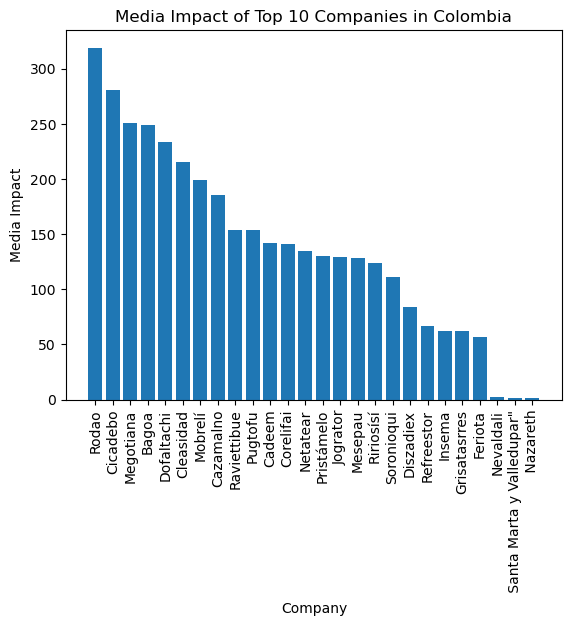

In [7]:
# Grafico de barras

plt.bar(companies_new_vol.index, companies_new_vol.values)
plt.xlabel('Empresas')
plt.ylabel('Densidad de noticias')
plt.title('Impacto mediatico de empresas en Colombia')
plt.xticks(rotation=90)
plt.show()